

# Investigate TMDB movies Dataset -  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this report is to analyze **The Movie Database (TMDb)** to discover insight into the movie world.

Let's talk about TMDb:

The Movie Database (TMDb) is a community-built movie and TV database. Every piece of data has been added by TMDb amazing community dating back to 2008. The TMDb datasets contain movie information such as movie titles and casts, directors, movie genres, production companies, movie rates, release year, budget revenue.

**The Movie Database questions focus on:**
>•	Which movies are the most Profit?
>
>•	Which movies are the most popular of all time?
>
>•	Which genres are the most popular of all time?
>
>•	Which actors are the most popular?
>
>•	Which movie title had the highest budget?
>
>•	Which movie title had the highest vote count?
>
>•	Which movie title had the longest run time?
>
>•	Which popular movies had the highest budgets?
>
>•	Which movie actors got the highest vote counts?
>
>•	How is popularity trending over the period of time?
>
>•	How is revenue trending over the period of time?
>
>•	How runtime trends over the time?
>
>•	Do top ratings movies always generate big revenue?
>
>•	Higher budget movies always generate big revenue?
>
>•	Is there any impact of vote count on revenue?
>
>•	list of most popular directors based on ratings
>
>•	list of directors that generates big revenue
>
>•	Is there a relation between movie genres and vote?
>
>•	list of Genres that generates big revenue


**Import Libraries to start analysis::**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

**Export File - tmdb-movies.csv:**

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


<a id='intro'></a>
## Data Wrangling

The **shape** that returns a tuple with each index having the number of corresponding elements.

In [4]:
df.shape

(10866, 21)

Summary of TMDB movies dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Basic **Statistical** Details for TMDB movies

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


Sum of duplicate:

In [7]:
sum(df.duplicated())

1

I dropped all duplicates:

In [8]:
df.drop_duplicates(inplace=True)


Show number of duplicates:

In [9]:
df[df.duplicated() == True].shape

(0, 21)

Return number of unique elements in the columns

In [10]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


show a bit of a recap on Indexing and selecting the **TMDB movies dataset**:

In [11]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"





Show **original title** and **revenue** columns

In [12]:
df[['original_title','revenue_adj']].head()

,original_title,revenue_adj
0,Jurassic World,"1,392,445,892.52"
1,Mad Max: Fury Road,"348,161,292.49"
2,Insurgent,"271,619,025.41"
3,Star Wars: The Force Awakens,"1,902,723,129.80"
4,Furious 7,"1,385,748,801.47"


Get some Rows:

In [13]:
df[1:4]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"


Selectiting rows and coulumns based on their name

In [14]:
df.loc[2:5,'original_title':'director']

,original_title,cast,homepage,director
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan
5,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu


Selectiting rows and coulumns based on their ordering:

In [15]:
df.iloc[0:5,5:7]

,original_title,cast
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


Selecting use a bool serise:

In [16]:
df[df['vote_average'] > 8].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
441,355020,tt4908644,0.22,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.20,2015,0.00,0.00
538,224972,tt3983674,0.11,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.90,2015,0.00,0.00
550,367215,tt5083702,0.11,0,0,The Fear of 13,Sammy Silverwatch,http://www.thefearof13.com/,David Sington,We are the stories we tell.,...,After 23 years on Death Row a convicted murder...,96,Thriller|Documentary,NaN,10/15/15,19,8.20,2015,0.00,0.00
609,321640,tt4299972,0.03,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,NaN,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,...,"Robert Durst, scion of one of New Yorkâ€™s bil...",240,Documentary,Blumhouse Productions|Hit the Ground Running F...,2/8/15,72,8.40,2015,0.00,0.00
611,303867,tt4171032,0.03,0,0,World of Tomorrow,Julia Pott|Winona Mae,http://bitterfilms.com,Don Hertzfeldt,NaN,...,A little girl is contacted by a mysterious woman.,17,Animation|Comedy|Science Fiction,Bitter Films,3/31/15,47,8.20,2015,0.00,0.00


Sum null values for each column

In [17]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Show detail for each column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

Convert data coulumns ( budget_adj , revenue_adj ) from **float64** to **int64**

In [19]:
df[['budget_adj','revenue_adj']] = df[['budget_adj', 'revenue_adj', ]].applymap(np.int64)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

Sort runtime values list.

In [21]:
df.sort_values('runtime')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
410,339342,tt2948712,0.10,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.60,2015,0,0
3857,289097,tt1288636,0.10,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,NaN,Stephen Kay,NaN,...,Cocky young attorney Michael Gray finds himsel...,0,Horror,Access Motion Pictures,6/10/11,13,5.20,2011,0,0
2370,127717,tt1525359,0.08,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.80,2010,0,0
2315,48373,tt1274296,0.17,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,http://www.listentoyourheartfilm.com/,NaN,One song can change your life.,...,Danny Foster doesn't have much: an apartment a...,0,Drama|Music|Romance,NaN,8/14/10,29,7.30,2010,0,0
3884,105885,tt1754944,0.05,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Gal...,NaN,J.C. Calciano,NaN,...,From the director of Is It Just Me? comes this...,0,Romance,NaN,6/23/11,12,4.60,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,18729,tt0088583,0.00,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.00,1985,0,0
6176,42044,tt0090015,0.15,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,Claude Lanzmann,NaN,...,Claude Lanzmann directed this 9 1/2 hour docum...,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,11/1/85,16,8.30,1985,0,0
2722,331214,tt0185906,0.54,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.00,2001,0,153936014
4041,150004,tt0289830,0.47,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,12/2/02,38,6.80,2002,0,0




How many movies in the dataset TMDB?

In [22]:
df.original_title.count()

10865

Separate texts for genres, cast and production companies columns. 

In [23]:
df['genres']= df['genres'].str.split("|", n = 1, expand = True) 

In [24]:
df['cast']= df['cast'].str.split("|", n = 1, expand = True)

In [25]:
df['production_companies']= df['production_companies'].str.split("|", n = 1, expand = True) 

How many genres of movies in the dataset TMDB?

In [26]:
df['genres'].value_counts(ascending=False)

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

Rename Columns

In [27]:
df.rename(columns = {'id': 'ID'}, inplace=True)
df.rename(columns = {'popularity': 'Popularity'}, inplace=True)
df.rename(columns = {'original_title': 'Title'}, inplace=True)
df.rename(columns = {'cast': 'Actor'}, inplace=True)
df.rename(columns = {'director': 'Director'}, inplace=True)
df.rename(columns = {'runtime': 'Runtime'}, inplace=True)
df.rename(columns = {'genres': 'Genres'}, inplace=True)
df.rename(columns = {'vote_count': 'Vote Count'}, inplace=True)
df.rename(columns = {'release_year': 'Year'}, inplace=True)
df.rename(columns = {'budget_adj': 'Budget'}, inplace=True)
df.rename(columns = {'revenue_adj': 'Revenue'}, inplace=True)

I dropped the columns that I will not use in the analysis,

In [28]:
df.drop(['imdb_id','budget','revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)
df.head()

,ID,Popularity,Title,Actor,Director,Runtime,Genres,Vote Count,vote_average,Year,Budget,Revenue
0,135397,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.50,2015,137999939,1392445892
1,76341,28.42,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.10,2015,137999939,348161292
2,262500,13.11,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.30,2015,101199955,271619025
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.50,2015,183999919,1902723129
4,168259,9.34,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.30,2015,174799923,1385748801


show columns that we will use for analysis.

In [29]:
df.columns

Index(['ID', 'Popularity', 'Title', 'Actor', 'Director', 'Runtime', 'Genres',
       'Vote Count', 'vote_average', 'Year', 'Budget', 'Revenue'],
      dtype='object')

<a id='intro'></a>
## Exploratory Data Analysis

Which movies are the most Profit?

In [30]:
df['Profit'] = df['Revenue'] - df['Budget']

In [31]:
df[['Title','Profit']].sort_values('Profit', ascending=False)

,Title,Profit
1329,Star Wars,2750136651
1386,Avatar,2586236848
5231,Titanic,2234713671
10594,The Exorcist,2128035625
9806,Jaws,1878643093
...,...,...
7031,The Alamo,-137586847
10684,Waterloo,-140409208
2069,The Wolfman,-150000000
5508,The Lone Ranger,-155110171


Which movies are the most popular of all time?

In [32]:
df[['Title', 'Popularity']].sort_values('Popularity',ascending=False)

,Title,Popularity
0,Jurassic World,32.99
1,Mad Max: Fury Road,28.42
629,Interstellar,24.95
630,Guardians of the Galaxy,14.31
2,Insurgent,13.11
...,...,...
6961,Khosla Ka Ghosla!,0.00
6551,Mon petit doigt m'a dit...,0.00
6080,G.B.F.,0.00
9977,The Hospital,0.00


Which genres are the most popular of all time?

In [33]:
df['Genres'].value_counts(ascending=False)

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: Genres, dtype: int64

Which actors are the most popular?

In [34]:
df['Actor'].value_counts(ascending=False)

Nicolas Cage        50
Robert De Niro      42
Bruce Willis        39
Clint Eastwood      38
Johnny Depp         37
                    ..
Jennifer O'Neill     1
Sean Biggerstaff     1
Samuli Torssonen     1
Keegan Edwards       1
Andrew Dice Clay     1
Name: Actor, Length: 4300, dtype: int64

Which movie title had the highest budget?

In [35]:
df[['Title', 'Budget']].sort_values('Budget',ascending=False)

,Title,Budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,368371256
7387,Pirates of the Caribbean: At World's End,315500574
6570,Superman Returns,292050672
5231,Titanic,271692064
...,...,...
1184,Dans la cour,0
1185,Crawl or Die,0
7003,Scooby-Doo 2: Monsters Unleashed,0
1186,Red Army,0


Which movie title had the highest vote count?

In [36]:
df[['Title', 'Vote Count']].sort_values('Vote Count',ascending=False)

,Title,Vote Count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375
...,...,...
7620,Gracie,10
1560,Beautiful Kate,10
7622,Import/Export,10
1575,Space Buddies,10


Which movie title had the longest run time?

In [37]:
df[['Title', 'Runtime']].sort_values('Runtime',ascending=False)

,Title,Runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561
...,...,...
3329,"Grande, grosso e Verdone",0
4138,A Time for Dancing,0
1241,Dance-Off,0
6383,The 12 Dogs of Christmas,0


Which popular movies had the highest budgets?

In [38]:
PMHB = df[['Title', 'Popularity','Budget']].sort_values('Budget',ascending=False)
PMHB.head(5)

,Title,Popularity,Budget
2244,The Warrior's Way,0.25,425000000
3375,Pirates of the Caribbean: On Stranger Tides,4.96,368371256
7387,Pirates of the Caribbean: At World's End,4.97,315500574
6570,Superman Returns,1.96,292050672
5231,Titanic,4.36,271692064


Which movie actors got the highest vote counts?

In [39]:
df[['Title', 'Actor','Vote Count']].sort_values('Vote Count',ascending=False)

,Title,Actor,Vote Count
1919,Inception,Leonardo DiCaprio,9767
4361,The Avengers,Robert Downey Jr.,8903
1386,Avatar,Sam Worthington,8458
2875,The Dark Knight,Christian Bale,8432
4364,Django Unchained,Jamie Foxx,7375
...,...,...,...
7620,Gracie,Jesse Lee Soffer,10
1560,Beautiful Kate,Ben Mendelsohn,10
7622,Import/Export,Ekateryna Rak,10
1575,Space Buddies,Diedrich Bader,10


How is popularity trending over the period of time?

In [40]:
YPT = df.groupby('Year').sum()
YPT[['Popularity']]

,Popularity
Year,
1960,14.69
1961,13.11
1962,14.55
1963,17.09
1964,17.32
1965,11.99
1966,13.99
1967,18.85
1968,18.88


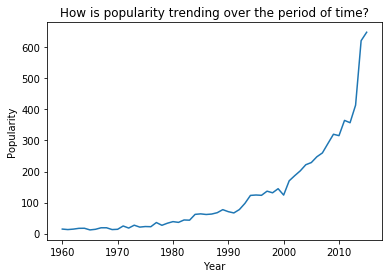

In [41]:
plt.plot(YPT.loc[:,"Popularity"])

plt.title('How is popularity trending over the period of time?')
plt.ylabel("Popularity")
plt.xlabel('Year')
plt.show()

The line chart shows the popularity trending over the period of time.there were increasing trending of popularity between 1990 and 2010.

How is revenue trending over the period of time?

In [42]:
YRT = df.groupby('Year').sum()
YRT[['Revenue']]

,Revenue
Year,
1960,1069117142
1961,2463621894
1962,1553996296
1963,1334357132
1964,2397193105
1965,3170184645
1966,569262319
1967,4823050693
1968,1659601412


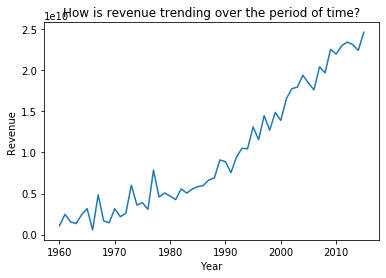

In [43]:
plt.plot(YRT.loc[:,"Revenue"])

plt.title('How is revenue trending over the period of time?')
plt.ylabel("Revenue")
plt.xlabel('Year')

plt.show()

The line chart shows the revenues trending over the period of time.there were increasing trending of revenues starting of 1980 until 2015.

How runtime trends over the time?

In [44]:
YRT = df.groupby('Year').sum()
YRT[['Runtime']]

,Runtime
Year,
1960,3541
1961,3702
1962,3979
1963,3785
1964,4587
1965,4136
1966,4917
1967,4198
1968,4184


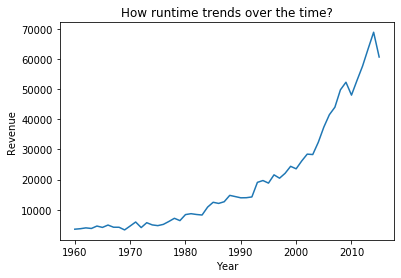

In [45]:
plt.plot(YRT.loc[:,"Runtime"])

plt.title('How runtime trends over the time?')
plt.ylabel("Revenue")
plt.xlabel('Year')

plt.show()

The line chart shows the runtime trending over the period of time.there were  increasing of runtime  between 1990 and 2013.

Do top ratings movies always generate big revenue?

In [58]:
df[['Title','vote_average', 'Revenue']].sort_values('Revenue',ascending=False)

,Title,vote_average,Revenue
3894,The Story of Film: An Odyssey,9.20,0
538,The Mask You Live In,8.90,0
1200,Black Mirror: White Christmas,8.80,0
2269,Life Cycles,8.80,0
6911,Pink Floyd: Pulse,8.70,0
...,...,...,...
7220,Superbabies: Baby Geniuses 2,2.10,10516214
2373,Birdemic: Shock and Terror,2.10,0
4882,Jurassic Shark,2.00,0
7772,Transmorphers,1.50,0


Higher budget movies always generate big revenue?

In [47]:
df[['Budget', 'Revenue']].sort_values('Budget',ascending=False)

,Budget,Revenue
2244,425000000,11087569
3375,368371256,990417500
7387,315500574,1010653507
6570,292050672,423020463
5231,271692064,2506405735
...,...,...
1184,0,0
1185,0,0
7003,0,209493550
1186,0,0


Is there any impact of vote count on revenue?

In [48]:
df[['Vote Count', 'Revenue']].sort_values('Vote Count',ascending=False)

,Vote Count,Revenue
1919,9767,825500000
4361,8903,1443191435
1386,8458,2827123750
2875,8432,1014733032
4364,7375,403991051
...,...,...
7620,10,3107721
1560,10,0
7622,10,0
1575,10,0


list of most popular directors based on ratings

In [49]:
df[['Director', 'vote_average']].sort_values('vote_average',ascending=False)

,Director,vote_average
3894,Mark Cousins,9.20
538,Jennifer Siebel Newsom,8.90
1200,Carl Tibbetts,8.80
2269,Derek Frankowski,8.80
6911,David Mallet,8.70
...,...,...
7220,Bob Clark,2.10
2373,James Nguyen,2.10
4882,Brett Kelly,2.00
7772,Leigh Scott,1.50


list of directors that generates big revenue

In [50]:
df[['Director', 'Revenue']].sort_values('Revenue',ascending=False)

,Director,Revenue
1386,James Cameron,2827123750
1329,George Lucas,2789712242
5231,James Cameron,2506405735
10594,William Friedkin,2167324901
9806,Steven Spielberg,1907005841
...,...,...
5761,Terry Klassen,0
5760,Tim McCanlies,0
5759,Ben Garant|Thomas Lennon,0
5758,Adrian Moat,0


Is there a relation between movie genres and vote?

In [51]:
LGV = df.groupby('Genres').mean()
LGV[['vote_average']].sort_values('vote_average',ascending=False)

,vote_average
Genres,
Documentary,6.92
Music,6.61
Animation,6.41
History,6.38
Crime,6.22
Drama,6.20
War,6.18
Romance,6.13
Western,6.08


list of Genres that generates big revenue

In [52]:
LGV = df.groupby('Genres').sum()
LGV[['Revenue']].sort_values('Revenue',ascending=False)

,Revenue
Genres,
Action,117676002305
Adventure,97589865033
Comedy,88997785723
Drama,87783608271
Animation,30915913280
Fantasy,22531828162
Horror,22124505276
Science Fiction,21296872505
Crime,17809414861


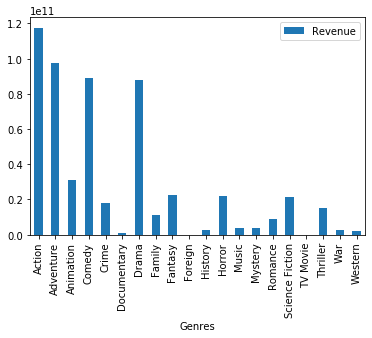

In [53]:
LGV[['Revenue']].plot.bar()

The bar chart shows the list of Genres that generates big revenue.
that appear the highest revenues for action movies type and the lowest revenue for Documentary movies type.

<a id='conclusions'></a>
## Conclusions





**The Movies That Changed the World.**

I started my exploratory data analysis about TMDb dataset through many questions:

To discover the movies have the most profit that include: "Star Ware" and "Avatar" and "Titanic" the top three they got high profit who watched those movies knew how much of hard work to achieve the highest profits. 

I think who watched "Jurassic World" and "Mad Max: Fury Road" or "Interstellar" know how those are get most popularity movies.

Did you ask your self what people like of genres and have the popularity? Let me tell you based in our data and analysis we seen the highest popularity type are Drama and Comedy then Action Movies.

Let's back to talk about which movies have highest budget when discover the highest number was 425000000$ for title movie "The Warrior's Way", sometimes we asked about rate how many people vote for these movies is the rate is fair! We look the highest vote count for "Inception" and "The Avengers" the first was number vote almost 9767 and the second 8903 person.

And the movie title had the longest run time was "The Story of Film: An Odyssey" by 900 runtime. And the movie actors got the highest vote counts was Leonardo DiCaprio, the revenue trending over the period of time people the was decreased then increased in revenue movies while the number increased since 1980 until 2010. And the runtime also increased through year by year I think reasons that made increased the number because starting internet in the world.

That make people have many ways to watch movies. then we start asking again Do top ratings movies always generate big revenue? It is not condition if the get excellent rating to get big revenue we noted in our dataset the "Avater" movie get rate 7.10 and 2827123750 revenue. The same thing with budget, totally agree and there is relationship between increased budget and higher revenue. There is a relation between movie genres and vote that dataset who the high vote for documentary movies and the list of Genres that generates big revenue was for action and Adventure movies and the lowest was documentary movies.


Finally, the movie world is amazing world and big through this world you can discover cultures, languages and environments and account of imaginary or real people and events told for entertainment. movies change.
